# DPM_avr23_continu_French_Industry

In [1]:
#importation des librairies utiles
#Traitement des données
import pandas as pd
import numpy as np 
from datetime import datetime
#Visualisations
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#Statistiques
from scipy.stats import pearsonr,chi2_contingency
import statsmodels.api

In [2]:
#importation et lecture du fichier csv
df_entreprise=pd.read_csv("base_etablissement_par_tranche_effectif.csv")
df_entreprise.head()

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


In [3]:

#affichage des infos du df
display(df_entreprise.info())
display(df_entreprise.columns)
print("pas de valeur non_nulle, la colonne 'REG' à transformer en object car référence nuémrique de la région")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36681 non-null  object
 1   LIBGEO    36681 non-null  object
 2   REG       36681 non-null  int64 
 3   DEP       36681 non-null  object
 4   E14TST    36681 non-null  int64 
 5   E14TS0ND  36681 non-null  int64 
 6   E14TS1    36681 non-null  int64 
 7   E14TS6    36681 non-null  int64 
 8   E14TS10   36681 non-null  int64 
 9   E14TS20   36681 non-null  int64 
 10  E14TS50   36681 non-null  int64 
 11  E14TS100  36681 non-null  int64 
 12  E14TS200  36681 non-null  int64 
 13  E14TS500  36681 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 3.9+ MB


None

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'E14TST', 'E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'],
      dtype='object')

pas de valeur non_nulle, la colonne 'REG' à transformer en object car référence nuémrique de la région


In [56]:
df_entreprise.describe()

,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
count,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000,36681.000000
mean,123.456067,83.555301,27.291486,5.220550,3.800333,2.296448,0.738339,0.332434,0.172760,0.048417
std,2353.384846,1729.874812,432.062116,83.685519,60.961216,32.597382,9.882131,4.850211,2.783668,1.091031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,19.000000,14.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,54.000000,39.000000,11.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,427385.000000,316603.000000,76368.000000,14836.000000,10829.000000,5643.000000,1658.000000,812.000000,456.000000,180.000000


In [4]:
#changement de type de la colonne REG
df_entreprise['REG']=df_entreprise['REG'].astype("str")
display(df_entreprise.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36681 entries, 0 to 36680
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   CODGEO    36681 non-null  object
 1   LIBGEO    36681 non-null  object
 2   REG       36681 non-null  object
 3   DEP       36681 non-null  object
 4   E14TST    36681 non-null  int64 
 5   E14TS0ND  36681 non-null  int64 
 6   E14TS1    36681 non-null  int64 
 7   E14TS6    36681 non-null  int64 
 8   E14TS10   36681 non-null  int64 
 9   E14TS20   36681 non-null  int64 
 10  E14TS50   36681 non-null  int64 
 11  E14TS100  36681 non-null  int64 
 12  E14TS200  36681 non-null  int64 
 13  E14TS500  36681 non-null  int64 
dtypes: int64(10), object(4)
memory usage: 3.9+ MB


None

In [5]:
print(df_entreprise.duplicated().value_counts())
print("pas de doublons identifié dans le df_entreprise")

False    36681
dtype: int64
pas de doublons identifié dans le df_entreprise


In [6]:
#affichage des valeurs prises par REG
display("affichage du nombre de lignes(correspondant aux communes avec entreprises) par région",df_entreprise['REG'].value_counts())
print("le nombre de communes accueillant des entreprises varie entre 17 dans la région 6 et 3020 dans la région 73, il existe de grandes disparités dans les chiffres de cette colonnes")


'affichage du nombre de lignes(correspondant aux communes avec entreprises) par région'

73    3020
82    2874
41    2338
72    2296
22    2291
26    2046
21    1953
24    1841
25    1812
43    1785
91    1545
31    1545
52    1496
54    1460
23    1420
83    1310
11    1281
53    1270
93     958
42     904
74     747
94     360
2       34
1       32
4       24
3       22
6       17
Name: REG, dtype: int64

le nombre de communes accueillant des entreprises varie entre 17 dans la région 6 et 3020 dans la région 73, il existe de grandes disparités dans les chiffres de cette colonnes


Nous confirmons par ce graphe les infos du value_count quant à la disparité entre les régions, il est aussi facile de voir que les entreprises de 0 employés (ou nbre indéterminé) sont une classe majoritaire dans l'ensemble des régions. Il serait intéressant de supprimer cette classe pour voir l'évolution des autres classes plus précisemment.


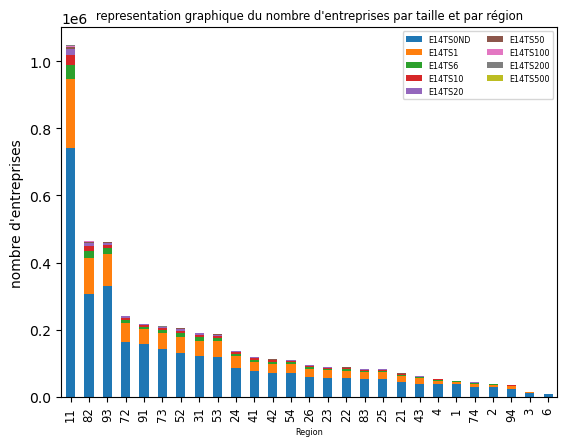

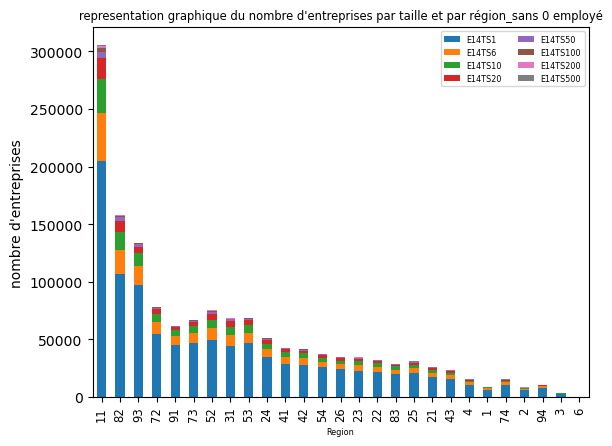

In [7]:
#### affichage d'une représentation graphique du nombre d'entreprise en fonction de la taille et en fonction de la région puis du départemement
#plt.figure(figsize=(20,12))

df=df_entreprise.groupby('REG').agg({'E14TST':'sum','E14TS0ND': 'sum', 'E14TS1': 'sum',
       'E14TS6': 'sum', 'E14TS10': 'sum', 'E14TS20': 'sum', 'E14TS50': 'sum', 'E14TS100': 'sum', 'E14TS200': 'sum',
       'E14TS500': 'sum'})
df=df.reset_index()


df['total_entreprise_reg']=df.sum(axis=1, numeric_only=True)

df.sort_values('E14TST', ascending=False).plot.bar(x='REG', y=['E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'], stacked=True)
plt.title("representation graphique du nombre d'entreprises par taille et par région", fontsize="small")
plt.xlabel("Region", fontsize="xx-small")
plt.xticks(fontsize="small")
plt.ylabel("nombre d'entreprises")
plt.legend(ncol=2, fontsize="xx-small");

#nouvelle représentation sans les entreprises de 0 employé ou nondéterminé
df.sort_values('E14TST', ascending=False).plot.bar(x='REG', y=['E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'], stacked=True)
plt.title("representation graphique du nombre d'entreprises par taille et par région_sans 0 employé", fontsize="small")
plt.xlabel("Region",fontsize="xx-small")
plt.xticks(fontsize="small")
plt.ylabel("nombre d'entreprises")
plt.legend(ncol=2, fontsize="xx-small");

print("Nous confirmons par ce graphe les infos du value_count quant à la disparité entre les régions, il est aussi facile de voir que les entreprises de 0 employés (ou nbre indéterminé) sont une classe majoritaire dans l'ensemble des régions. Il serait intéressant de supprimer cette classe pour voir l'évolution des autres classes plus précisemment.")

In [8]:
#affichage des départements correspondants aux régions extrèmes du graphe
dep_top11=df_entreprise[df_entreprise['REG']=='11']
display("les départements fort de la régions 11 sont (affichage du nombre d'entreprise par départemement):",dep_top11.groupby('DEP').agg({'E14TST':'sum'}))

dep_top82=df_entreprise[df_entreprise['REG']=='82']
display("les départements fort de la régions 82 sont (affichage du nombre d'entreprise par départemement):",dep_top82.groupby('DEP').agg({'E14TST':'sum'}))
dep_top93=df_entreprise[df_entreprise['REG']=='93']
display("les départements fort de la régions 93 sont (affichage du nombre d'entreprise par départemement):",dep_top93.groupby('DEP').agg({'E14TST':'sum'}))
dep_top72=df_entreprise[df_entreprise['REG']=='72']
display("les départements fort de la régions 72 sont (affichage du nombre d'entreprise par départemement):",dep_top72.groupby('DEP').agg({'E14TST':'sum'}))
dep_top91=df_entreprise[df_entreprise['REG']=='91']
display("les départements fort de la régions 91 sont (affichage du nombre d'entreprise par départemement):",dep_top91.groupby('DEP').agg({'E14TST':'sum'}))

"les départements fort de la régions 11 sont (affichage du nombre d'entreprise par départemement):"

,E14TST
DEP,
75,427385
77,77591
78,90302
91,70468
92,131528
93,100131
94,82894
95,67953


"les départements fort de la régions 82 sont (affichage du nombre d'entreprise par départemement):"

,E14TST
DEP,
01,35464
07,20741
26,37237
38,81610
42,45573
69,136867
73,43311
74,64034


"les départements fort de la régions 93 sont (affichage du nombre d'entreprise par départemement):"

,E14TST
DEP,
04,14806
05,15444
06,124198
13,164883
83,95074
84,48567


"les départements fort de la régions 72 sont (affichage du nombre d'entreprise par départemement):"

,E14TST
DEP,
24,28946
33,112887
40,27552
47,22298
64,50907


"les départements fort de la régions 91 sont (affichage du nombre d'entreprise par départemement):"

,E14TST
DEP,
11,26636
30,53583
34,95799
48,5681
66,37019


In [9]:
dep_bottom_dom=df_entreprise[df_entreprise['REG']=='3']
display("les départements pauvres en entreprise de la régions 3 sont(affichage du nombre d'entreprise par départemement):",dep_bottom_dom.groupby('DEP').agg({'E14TST':'sum'}))

dep_bottom_métropole=df_entreprise[df_entreprise['REG']=='74']
display("les départements pauvres en entreprise de la régions 74 située en métropole sont(affichage du nombre d'entreprise par départemement):",dep_bottom_métropole.groupby('DEP').agg({'E14TST':'sum'}))

"les départements pauvres en entreprise de la régions 3 sont(affichage du nombre d'entreprise par départemement):"

,E14TST
DEP,
973,14499


"les départements pauvres en entreprise de la régions 74 située en métropole sont(affichage du nombre d'entreprise par départemement):"

,E14TST
DEP,
19,16049
23,7244
87,20630


In [10]:
#affichage du nombre de total d'entreprise référencées dans la BDD1
total_entreprise= df[['E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500']].sum()
display("affichage du nombre d'entreprises par classe d'effectif:",total_entreprise)


display("le nombre total d'entreprise référencé dans la BDD est de:",sum(total_entreprise))


"affichage du nombre d'entreprises par classe d'effectif:"

E14TS0ND    3064892
E14TS1      1001079
E14TS6       191495
E14TS10      139400
E14TS20       84236
E14TS50       27083
E14TS100      12194
E14TS200       6337
E14TS500       1776
dtype: int64

"le nombre total d'entreprise référencé dans la BDD est de:"

4528492

In [11]:
#affichage du df par départemement et calcul du nombre d'entreprises toutes classes confondues par départemement
df_dep=df_entreprise.groupby(['DEP']).agg({'E14TST':'sum','E14TS0ND': 'sum', 'E14TS1': 'sum',
       'E14TS6': 'sum', 'E14TS10': 'sum', 'E14TS20': 'sum', 'E14TS50': 'sum', 'E14TS100': 'sum', 'E14TS200': 'sum',
       'E14TS500': 'sum'})
df_dep=df_dep.reset_index()
df_dep=df_dep.sort_values(by='DEP')
display(df_dep.sort_values('E14TST', ascending=False).head(10))
display(df_dep.info())




,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
75,75,427385,316603,76368,14836,10829,5643,1658,812,456,180
12,13,164883,115300,34729,6322,4388,2617,915,379,188,45
69,69,136867,89068,31460,6252,4895,3279,1092,482,275,64
92,92,131528,93845,23646,4884,3784,2785,1121,704,515,244
59,59,129819,84394,29479,6170,4683,3197,1033,516,272,75
5,06,124198,90148,25224,3967,2772,1423,397,172,71,24
33,33,112887,77462,24314,4561,3392,2060,680,260,119,39
93,93,100131,67911,22200,4265,2918,1667,559,329,204,78
34,34,95799,69339,19049,3251,2255,1298,379,142,69,17
83,83,95074,68405,20263,3010,1968,968,315,93,45,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DEP       101 non-null    object
 1   E14TST    101 non-null    int64 
 2   E14TS0ND  101 non-null    int64 
 3   E14TS1    101 non-null    int64 
 4   E14TS6    101 non-null    int64 
 5   E14TS10   101 non-null    int64 
 6   E14TS20   101 non-null    int64 
 7   E14TS50   101 non-null    int64 
 8   E14TS100  101 non-null    int64 
 9   E14TS200  101 non-null    int64 
 10  E14TS500  101 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 9.5+ KB


None

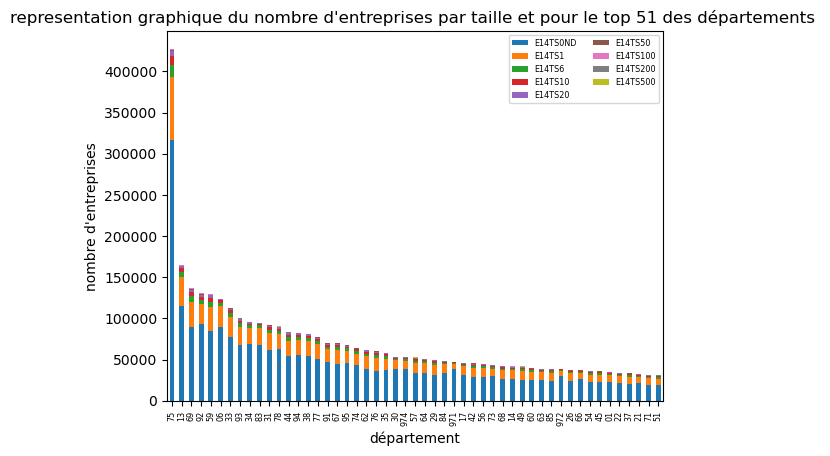

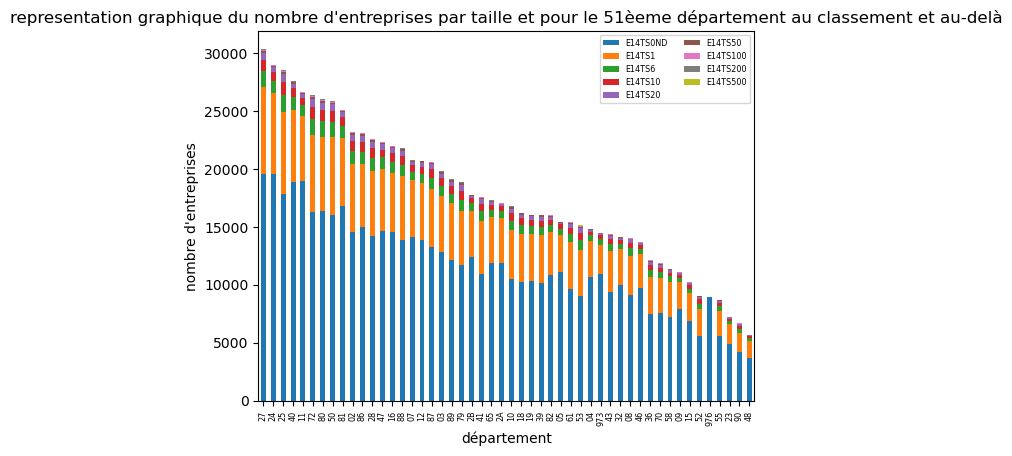

In [12]:
#représentation graphique du nombre d'entreprises par nombre d'employés et par départemement
df_dep.sort_values('E14TST', ascending=False).head(51).plot.bar(x='DEP', y=['E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'], stacked=True)
plt.title("representation graphique du nombre d'entreprises par taille et pour le top 51 des départements ")
plt.xlabel("département")
plt.xticks(rotation=90,fontsize="xx-small")
plt.ylabel("nombre d'entreprises")
plt.legend(ncol=2, fontsize="xx-small");

df_dep.sort_values('E14TST', ascending=False).tail(50).plot.bar(x='DEP', y=['E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'], stacked=True)
plt.title("representation graphique du nombre d'entreprises par taille et pour le 51èeme département au classement et au-delà")
plt.xlabel("département")
plt.xticks(rotation=90,fontsize="xx-small")
plt.ylabel("nombre d'entreprises")
plt.legend(ncol=2, fontsize="xx-small");


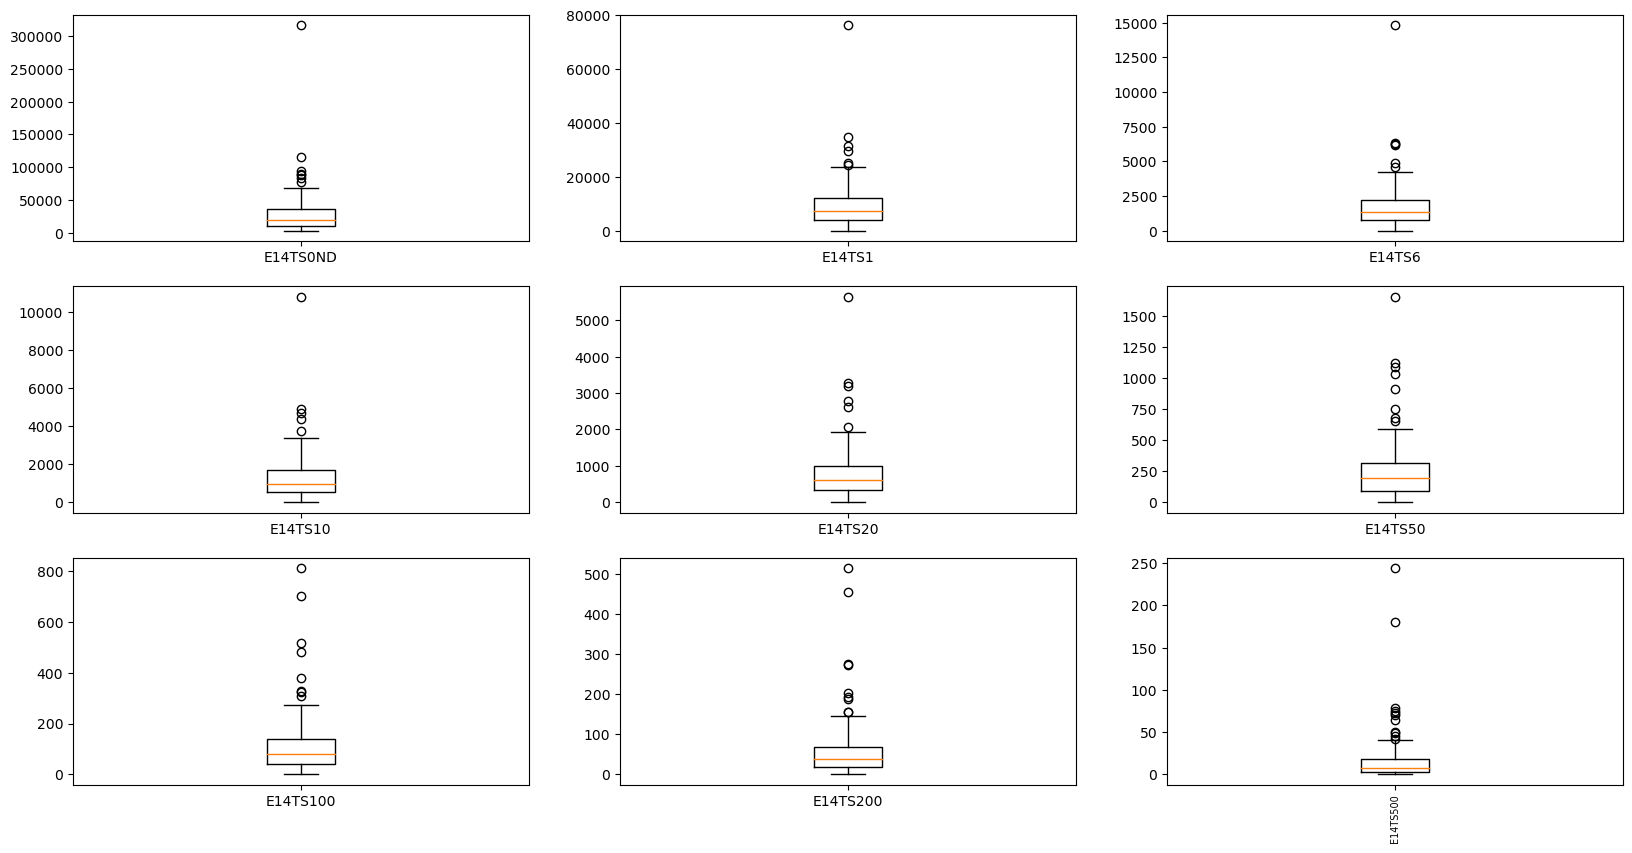

In [13]:
#affichage des boites à moustaches représentant le nombre d'entreprises par classe de nombre d'employés
plt.figure(figsize=(20,10))
plt.subplot(331)
plt.boxplot([df_dep.E14TS0ND], labels=['E14TS0ND'])
plt.subplot(332)
plt.boxplot(df_dep.E14TS1, labels=['E14TS1'])
plt.subplot(333)
plt.boxplot(df_dep.E14TS6, labels=['E14TS6'])
plt.subplot(334)
plt.boxplot(df_dep.E14TS10, labels=['E14TS10'])
plt.subplot(335)
plt.boxplot(df_dep.E14TS20, labels=['E14TS20'])
plt.subplot(336)
plt.boxplot(df_dep.E14TS50, labels=['E14TS50'])
plt.subplot(337)
plt.boxplot(df_dep.E14TS100, labels=['E14TS100'])
plt.subplot(338)
plt.boxplot(df_dep.E14TS200, labels=['E14TS200'])
plt.subplot(339)
plt.boxplot(df_dep.E14TS500, labels=['E14TS500'])
plt.xticks(rotation=90,fontsize="x-small");

In [14]:
#lecture et affichage du csv sur les villes Françaises
df_ville=pd.read_csv("name_geographic_information.csv")
display(df_ville.head())
display(df_ville.info(), "quelques valeurs nulles sont observées pour les coordonnées géographiques ainsi que pour a colonne éloignement")
display("combien y a t il d'information dupliquée dans le df:",df_ville.duplicated().sum())

df_ville[['code_région', 'numéro_circonscription','code_insee']]=df_ville[['code_région', 'numéro_circonscription','code_insee']].astype(str)
df_ville['longitude']=df_ville['longitude'].str.replace(',','.')


,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EU_circo                36840 non-null  object 
 1   code_région             36840 non-null  int64  
 2   nom_région              36840 non-null  object 
 3   chef.lieu_région        36840 non-null  object 
 4   numéro_département      36840 non-null  object 
 5   nom_département         36840 non-null  object 
 6   préfecture              36840 non-null  object 
 7   numéro_circonscription  36840 non-null  int64  
 8   nom_commune             36840 non-null  object 
 9   codes_postaux           36840 non-null  object 
 10  code_insee              36840 non-null  int64  
 11  latitude                33911 non-null  float64
 12  longitude               33999 non-null  object 
 13  éloignement             33878 non-null  float64
dtypes: float64(2), int64(3), object(9)
mem

None

'quelques valeurs nulles sont observées pour les coordonnées géographiques ainsi que pour a colonne éloignement'

"combien y a t il d'information dupliquée dans le df:"

0

In [15]:
df_ville['longitude']=df_ville['longitude'].fillna(-100)
df_ville['latitude']=df_ville['latitude'].fillna(-100)
df_ville['éloignement']=df_ville['éloignement'].fillna(-100)
display(df_ville.isna().sum())



EU_circo                  0
code_région               0
nom_région                0
chef.lieu_région          0
numéro_département        0
nom_département           0
préfecture                0
numéro_circonscription    0
nom_commune               0
codes_postaux             0
code_insee                0
latitude                  0
longitude                 0
éloignement               0
dtype: int64

In [16]:

display(df_ville[df_ville['longitude']=='-'])
df_ville['longitude']=df_ville['longitude'].replace(to_replace='-', value=-100)

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
5111,Nord-Ouest,25,Basse-Normandie,Caen,14,Calvados,Caen,3,Vaudeloges,14170,14729,48.950000,-,1.32
5172,Nord-Ouest,25,Basse-Normandie,Caen,14,Calvados,Caen,4,Gerrots,14430,14300,49.200000,-,1.03
5182,Nord-Ouest,25,Basse-Normandie,Caen,14,Calvados,Caen,4,Heuland,14430,14329,49.266667,-,1.15
5236,Nord-Ouest,25,Basse-Normandie,Caen,14,Calvados,Caen,4,Saint-Vaast-en-Auge,14640,14660,49.283333,-,1.28
5248,Nord-Ouest,25,Basse-Normandie,Caen,14,Calvados,Caen,4,Villers-sur-Mer,14640,14754,49.316667,-,1.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32507,Ouest,54,Poitou-Charentes,Poitiers,79,Deux-Sèvres,Niort,2,Les Alleuds,79190,79006,46.150000,-,1.72
32524,Ouest,54,Poitou-Charentes,Poitiers,79,Deux-Sèvres,Niort,2,Melleran,79190,79175,46.133333,-,1.72
34691,Ouest,54,Poitou-Charentes,Poitiers,86,Vienne,Poitiers,2,Chalandray,86190,86050,46.666667,-,1.86
34818,Ouest,54,Poitou-Charentes,Poitiers,86,Vienne,Poitiers,3,Sanxay,86600,86253,46.500000,-,1.73


In [17]:
df_ville['longitude']=df_ville['longitude'].astype(float)

In [18]:
df_ville.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36840 entries, 0 to 36839
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EU_circo                36840 non-null  object 
 1   code_région             36840 non-null  object 
 2   nom_région              36840 non-null  object 
 3   chef.lieu_région        36840 non-null  object 
 4   numéro_département      36840 non-null  object 
 5   nom_département         36840 non-null  object 
 6   préfecture              36840 non-null  object 
 7   numéro_circonscription  36840 non-null  object 
 8   nom_commune             36840 non-null  object 
 9   codes_postaux           36840 non-null  object 
 10  code_insee              36840 non-null  object 
 11  latitude                36840 non-null  float64
 12  longitude               36840 non-null  float64
 13  éloignement             36840 non-null  float64
dtypes: float64(3), object(11)
memory usage

In [19]:
#affichage des valeurs prises par la colonne EU_circo, nom de région
display("valeurs de la colonne EU_circo:",df_ville['EU_circo'].value_counts())
display("valeurs de la colonne nom_region:",df_ville['nom_région'].value_counts(), "Nombre de région:",len(df_ville['nom_région'].unique()))


'valeurs de la colonne EU_circo:'

Est              9034
Nord-Ouest       7091
Sud-Ouest        6880
Ouest            4253
Sud-Est          4225
Centre           3911
Île-de-France    1314
Outre-Mer         132
Name: EU_circo, dtype: int64

'valeurs de la colonne nom_region:'

Midi-Pyrénées                 3028
Rhône-Alpes                   2890
Lorraine                      2336
Aquitaine                     2300
Picardie                      2295
Bourgogne                     2050
Champagne-Ardenne             1954
Centre                        1849
Basse-Normandie               1815
Franche-Comté                 1787
Nord-Pas-de-Calais            1558
Languedoc-Roussillon          1552
Pays de la Loire              1515
Poitou-Charentes              1465
Haute-Normandie               1423
Île-de-France                 1314
Auvergne                      1313
Bretagne                      1273
Provence-Alpes-Côte d'Azur     975
Alsace                         907
Limousin                       749
Corse                          360
Guadeloupe                      34
Martinique                      34
La Réunion                      24
Guyane                          22
Mayotte                         14
Saint-Pierre-et-Miquelon         4
Name: nom_région, dt

'Nombre de région:'

28

In [20]:
display("nombre de commune unique représentée dans le dataframe:",len(df_ville['nom_commune'].unique()))
display(df_ville['nom_commune'].value_counts(ascending=False).head(30))
display(df_ville.groupby(['nom_région']).agg({'nom_commune':'count'}))

'nombre de commune unique représentée dans le dataframe:'

34142

Paris               21
Sainte-Colombe      14
Saint-Sauveur       12
Beaulieu            11
Sainte-Marie        11
Saint-Sulpice       11
Beaumont            10
Saint-Loup          10
Saint-Aubin         10
Saint-Paul           9
Le Pin               9
Saint-Hilaire        9
Saint-Médard         9
Saint-Christophe     9
Saint-Marcel         9
Saint-Michel         9
Ferrières            8
Saint-Julien         8
Saint-Hippolyte      8
Saint-Rémy           8
Sainte-Croix         8
Saint-Just           8
Marseille            8
Verrières            8
Brion                8
Saint-Pierre         8
Saint-Georges        8
Saint-Clément        8
Saint-Martin         7
Mons                 7
Name: nom_commune, dtype: int64

,nom_commune
nom_région,
Alsace,907
Aquitaine,2300
Auvergne,1313
Basse-Normandie,1815
Bourgogne,2050
Bretagne,1273
Centre,1849
Champagne-Ardenne,1954
Corse,360


In [21]:
df_ville=df_ville.rename(columns={'nom_commune':'LIBGEO'})

In [22]:
df_population= pd.read_csv("population.csv")
df_population=df_population.merge(df_entreprise[['LIBGEO', 'DEP']], on='LIBGEO', how='inner')
display(df_population.head())
display(df_population.info())

C:\Users\lucie\AppData\Local\Temp\ipykernel_28688\328309087.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_population= pd.read_csv("population.csv")


,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,DEP
0,COM,1001,L'Abergement-Clémenciat,11,0,1,15,01
1,COM,1001,L'Abergement-Clémenciat,11,0,2,15,01
2,COM,1001,L'Abergement-Clémenciat,11,5,1,20,01
3,COM,1001,L'Abergement-Clémenciat,11,5,2,20,01
4,COM,1001,L'Abergement-Clémenciat,11,10,1,20,01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10553158 entries, 0 to 10553157
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   NIVGEO     object
 1   CODGEO     object
 2   LIBGEO     object
 3   MOCO       int64 
 4   AGEQ80_17  int64 
 5   SEXE       int64 
 6   NB         int64 
 7   DEP        object
dtypes: int64(4), object(4)
memory usage: 724.6+ MB


None

In [23]:
df_population.isna().sum()

NIVGEO       0
CODGEO       0
LIBGEO       0
MOCO         0
AGEQ80_17    0
SEXE         0
NB           0
DEP          0
dtype: int64

In [24]:
#colonne 1 est déterminée en tant qu'object suivant le warning, il n'y a qu'une valeur 'COM' présente_ à supprimer
df_population['NIVGEO'].value_counts()

COM    10553158
Name: NIVGEO, dtype: int64

In [25]:
#changement du type de la colonne 1 pour eviter le warning à la lecture du df
df_population['CODGEO'].astype(str)

0            1001
1            1001
2            1001
3            1001
4            1001
            ...  
10553153    97424
10553154    97424
10553155    97424
10553156    97424
10553157    97424
Name: CODGEO, Length: 10553158, dtype: object

In [26]:
df_population.isna().sum()

NIVGEO       0
CODGEO       0
LIBGEO       0
MOCO         0
AGEQ80_17    0
SEXE         0
NB           0
DEP          0
dtype: int64

In [27]:
display(df_population['MOCO'].value_counts())
print("le nombre d'informations de chaque catégorie est parfaitement identique pour toutes les classes")

11    1507594
12    1507594
21    1507594
22    1507594
23    1507594
31    1507594
32    1507594
Name: MOCO, dtype: int64

le nombre d'informations de chaque catégorie est parfaitement identique pour toutes les classes


In [28]:
#affichage de la répartition des âges de la population
display(df_population.sort_values('NB', ascending=False).head(10))
print("cette représentation du top 10 du nombre de population permet de montrer que la population de Paris est la plus dense du territoire; la catégorie enfant(sans distinction de genre) vivant avec 2 parents représente le maximum de personnes, puis vient la categorie femmes de 80+ ans vivant seule.")

df_pop_bottom=df_population.sort_values('NB', ascending=True)
df_pop_zero=df_pop_bottom[df_pop_bottom['NB']==0]
df_pop_min=df_pop_bottom[df_pop_bottom['NB']!=0]

#df_pop_zero=df_pop_zero.merge(df_entreprise[['LIBGEO','DEP']], on='LIBGEO')
#display(df_pop_zero.groupby(['DEP','LIBGEO']).agg({'NB':'mean'}))


display((df_pop_min.sort_values('NB', ascending=True).head(20)))
print("cette représentation du bottom de population nous montre qu'il y a un gap dans les départemements 2A et 2B sur une grande partie des classes d'age")

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,DEP
9319842,COM,75056,Paris,11,0,1,48873,75
9319843,COM,75056,Paris,11,0,2,46883,75
9320079,COM,75056,Paris,32,80,2,46700,75
9319844,COM,75056,Paris,11,5,1,40223,75
9320057,COM,75056,Paris,32,25,2,40147,75
9319845,COM,75056,Paris,11,5,2,38818,75
9319959,COM,75056,Paris,22,35,2,37909,75
9319921,COM,75056,Paris,21,25,2,37383,75
9319961,COM,75056,Paris,22,40,2,36125,75
9319846,COM,75056,Paris,11,10,1,35769,75


cette représentation du top 10 du nombre de population permet de montrer que la population de Paris est la plus dense du territoire; la catégorie enfant(sans distinction de genre) vivant avec 2 parents représente le maximum de personnes, puis vient la categorie femmes de 80+ ans vivant seule.


,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,DEP
4541991,COM,2B194,Ortale,32,80,2,1,2B
4559384,COM,2B302,San-Giovanni-di-Moriani,11,45,1,1,2B
4505710,COM,2A271,Sarrola-Carcopino,22,75,1,1,2A
4490542,COM,2A070,Casaglione,31,65,1,1,2A
4553452,COM,2B264,Rusio,12,5,1,1,2B
4490530,COM,2A070,Casaglione,31,35,1,1,2A
5819872,COM,40046,Biscarrosse,12,60,1,1,40
4548644,COM,2B234,Piobetta,32,55,1,1,2B
10503252,COM,95176,Cormeilles-en-Parisis,21,15,1,1,95
1295820,COM,7019,Aubenas,23,30,1,1,07


cette représentation du bottom de population nous montre qu'il y a un gap dans les départemements 2A et 2B sur une grande partie des classes d'age


In [29]:
df_salaire=pd.read_csv("net_salary_per_town_categories.csv")
df_salaire=df_salaire.merge(df_entreprise[['LIBGEO','DEP']], on='LIBGEO')
display(df_salaire.head())
display(df_salaire.info())
display(df_salaire.columns)

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014,DEP
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6,01
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4,01
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6,01
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9,01
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9,01


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6044 entries, 0 to 6043
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CODGEO     6044 non-null   object 
 1   LIBGEO     6044 non-null   object 
 2   SNHM14     6044 non-null   float64
 3   SNHMC14    6044 non-null   float64
 4   SNHMP14    6044 non-null   float64
 5   SNHME14    6044 non-null   float64
 6   SNHMO14    6044 non-null   float64
 7   SNHMF14    6044 non-null   float64
 8   SNHMFC14   6044 non-null   float64
 9   SNHMFP14   6044 non-null   float64
 10  SNHMFE14   6044 non-null   float64
 11  SNHMFO14   6044 non-null   float64
 12  SNHMH14    6044 non-null   float64
 13  SNHMHC14   6044 non-null   float64
 14  SNHMHP14   6044 non-null   float64
 15  SNHMHE14   6044 non-null   float64
 16  SNHMHO14   6044 non-null   float64
 17  SNHM1814   6044 non-null   float64
 18  SNHM2614   6044 non-null   float64
 19  SNHM5014   6044 non-null   float64
 20  SNHMF181

None

Index(['CODGEO', 'LIBGEO', 'SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014', 'DEP'],
      dtype='object')

In [30]:
df_salaire.describe()

,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,SNHMFE14,SNHMFO14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
count,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,...,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000,6044.000000
mean,13.689146,23.709034,14.575943,10.568150,11.224735,12.042290,20.253574,13.286334,10.317819,9.816843,...,11.486466,9.537574,13.478607,15.859993,9.159282,12.060374,13.183703,9.803375,14.454252,17.639394
std,2.525002,2.798887,1.427124,0.813135,1.181796,1.777555,2.339185,0.988529,0.752199,1.091070,...,1.242786,0.958192,2.332765,3.546709,0.453783,1.819835,2.234540,1.476475,2.807841,4.478108
min,10.200000,16.000000,11.600000,8.700000,8.300000,9.300000,12.000000,10.600000,8.700000,6.100000,...,8.900000,7.900000,9.700000,10.500000,7.500000,9.100000,9.500000,7.800000,9.600000,10.800000
25%,12.100000,21.900000,13.800000,10.000000,10.600000,10.900000,18.800000,12.600000,9.800000,9.200000,...,10.800000,9.200000,11.975000,13.700000,8.900000,10.900000,11.775000,9.400000,12.600000,14.900000
50%,13.000000,23.300000,14.400000,10.400000,11.000000,11.500000,20.000000,13.100000,10.200000,9.700000,...,11.300000,9.400000,12.900000,14.900000,9.100000,11.600000,12.600000,9.700000,13.800000,16.500000
75%,14.400000,24.900000,15.100000,10.900000,11.600000,12.700000,21.500000,13.800000,10.600000,10.200000,...,11.900000,9.700000,14.300000,16.900000,9.400000,12.700000,14.000000,10.000000,15.400000,18.900000
max,43.300000,51.500000,54.600000,17.500000,46.300000,26.700000,35.500000,19.000000,16.100000,28.100000,...,53.200000,60.600000,38.100000,56.900000,12.000000,26.600000,31.000000,93.300000,45.400000,68.600000


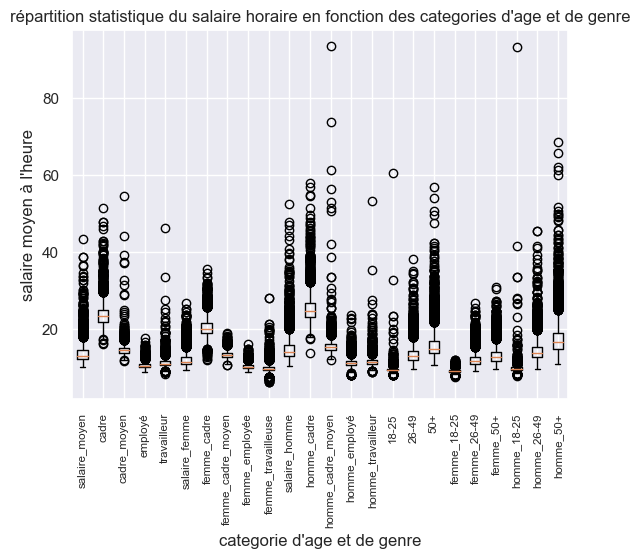

In [60]:
plt.boxplot(df_salaire[['SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014']], labels=['salaire_moyen','cadre','cadre_moyen','employé','travailleur','salaire_femme','femme_cadre','femme_cadre_moyen','femme_employée','femme_travailleuse','salaire_homme','homme_cadre','homme_cadre_moyen','homme_employé','homme_travailleur','18-25','26-49','50+','femme_18-25','femme_26-49','femme_50+','homme_18-25','homme_26-49','homme_50+'])
plt.title("répartition statistique du salaire horaire en fonction des categories d'age et de genre")
plt.xlabel("categorie d'age et de genre")
plt.xticks(rotation=90,fontsize="x-small")
plt.ylabel("salaire moyen à l'heure");

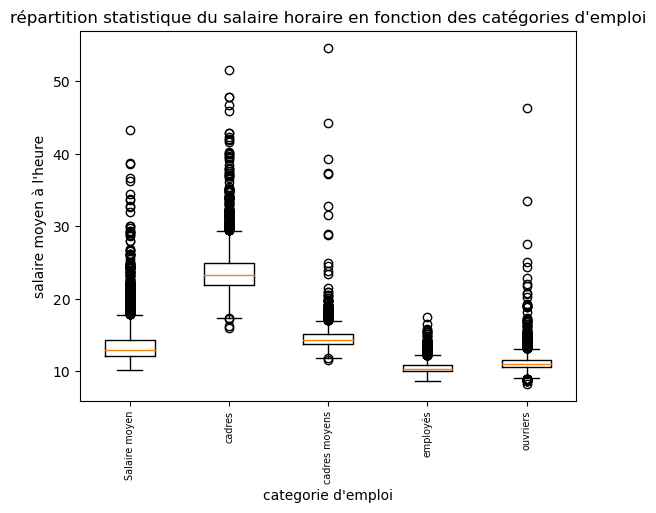

In [32]:
#affichage de la répartition statistique par catégorie d'emploi
plt.boxplot(df_salaire[['SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14']], labels=['Salaire moyen', 'cadres', 'cadres moyens', 'employés',
       'ouvriers'])
plt.title("répartition statistique du salaire horaire en fonction des catégories d'emploi")
plt.xlabel("categorie d'emploi")
plt.xticks(rotation=90,fontsize="x-small")
plt.ylabel("salaire moyen à l'heure");


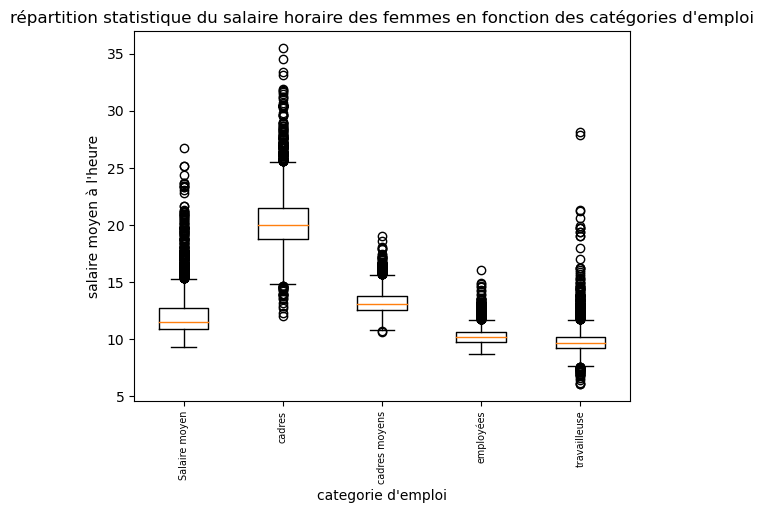

In [33]:
#affichage de la répartition statistique par catégorie d'emploi pour les femmes
plt.boxplot(df_salaire[['SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14']], labels=['Salaire moyen', 'cadres', 'cadres moyens', 'employées',
       'travailleuse'])
plt.title("répartition statistique du salaire horaire des femmes en fonction des catégories d'emploi")
plt.xlabel("categorie d'emploi")
plt.xticks(rotation=90,fontsize="x-small")
plt.ylabel("salaire moyen à l'heure");

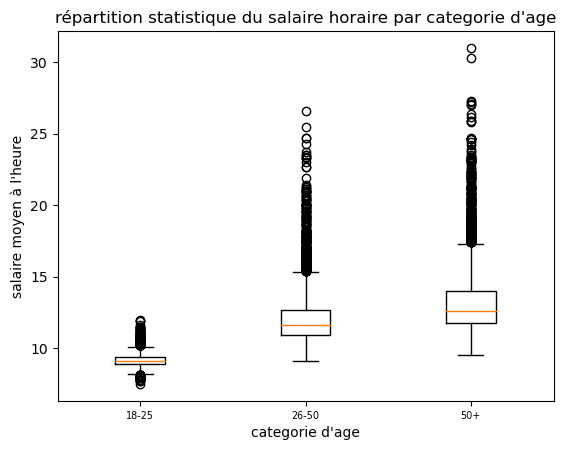

In [34]:
#affichage de la répartition statistique par catégorie d'age pour les femmes
plt.boxplot(df_salaire[['SNHMF1814','SNHMF2614', 'SNHMF5014']], labels=['18-25', '26-50','50+'])
plt.title("répartition statistique du salaire horaire par categorie d'age")
plt.xlabel("categorie d'age")
plt.xticks(rotation=0,fontsize="x-small")
plt.ylabel("salaire moyen à l'heure");

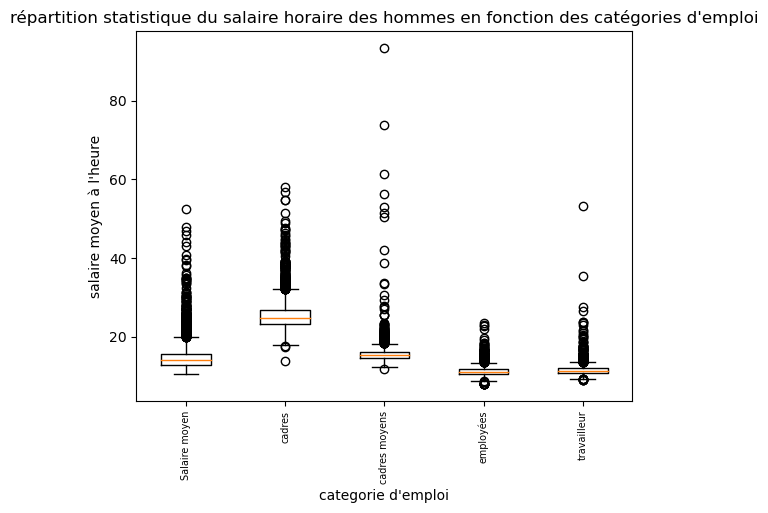

In [35]:
#affichage de la répartition statistique par catégorie d'emploi pour les hommes
plt.boxplot(df_salaire[['SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14']], labels=['Salaire moyen', 'cadres', 'cadres moyens', 'employées',
       'travailleur'])
plt.title("répartition statistique du salaire horaire des hommes en fonction des catégories d'emploi")
plt.xlabel("categorie d'emploi")
plt.xticks(rotation=90,fontsize="x-small")
plt.ylabel("salaire moyen à l'heure");

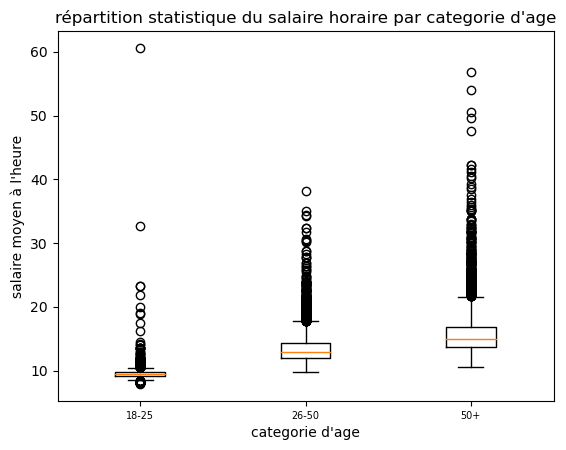

In [36]:
#affichage de la répartition statistique par catégorie d'age sans distinction de genre
plt.boxplot(df_salaire[['SNHM1814','SNHM2614', 'SNHM5014']], labels=['18-25', '26-50','50+'])
plt.title("répartition statistique du salaire horaire par categorie d'age")
plt.xlabel("categorie d'age")
plt.xticks(rotation=0,fontsize="x-small")
plt.ylabel("salaire moyen à l'heure");

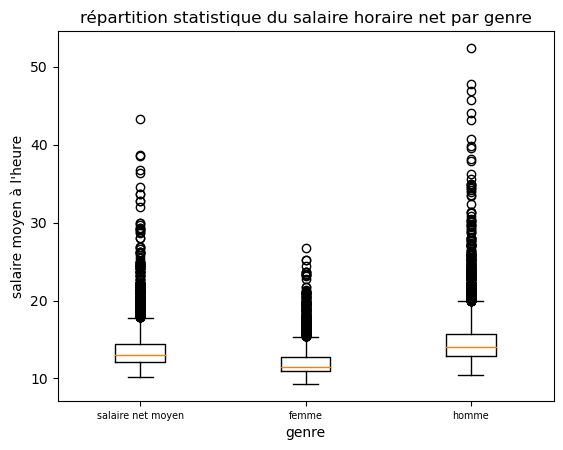

In [37]:
#affichage de la répartition statistique du salaire net moyen horaire par genre
plt.boxplot(df_salaire[['SNHM14','SNHMF14', 'SNHMH14']], labels=['salaire net moyen', 'femme','homme'])
plt.title("répartition statistique du salaire horaire net par genre")
plt.xlabel("genre")
plt.xticks(rotation=0,fontsize="x-small")
plt.ylabel("salaire moyen à l'heure");

In [38]:
df_merge=df_salaire.merge(df_entreprise[['LIBGEO','REG','DEP']], left_on='LIBGEO', right_on='LIBGEO')
df_merge

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014,DEP_x,REG,DEP_y
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,16.1,9.7,11.8,12.5,11.0,14.9,18.6,01,82,01
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,14.6,9.2,12.2,12.5,10.2,14.9,16.4,01,82,01
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,16.0,8.9,10.6,12.5,9.6,15.1,18.6,01,82,01
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,14.2,9.3,11.4,12.2,9.7,13.8,15.9,01,82,01
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,15.2,9.0,11.8,12.3,9.7,13.4,16.9,01,82,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,97420,Sainte-Suzanne,12.9,24.5,15.4,10.9,10.9,12.4,21.6,14.7,...,15.4,9.3,12.3,14.7,9.2,13.1,15.8,974,4,974
10296,97421,Salazie,10.4,17.3,13.8,9.6,9.8,9.8,13.2,11.4,...,11.4,8.9,9.9,10.5,9.0,11.0,11.7,974,4,974
10297,97422,Le Tampon,12.0,23.3,14.7,10.3,10.5,11.5,21.3,14.1,...,14.9,8.9,11.4,13.9,9.0,12.1,15.4,974,4,974
10298,97423,Les Trois-Bassins,11.4,22.6,13.4,10.1,10.5,10.8,15.9,12.4,...,13.1,8.9,11.1,11.4,9.0,11.8,13.7,974,4,974


# Construction d'un dataframe focus sur une région/ville

In [39]:
#affichage des premières lignes 4 dataframes
display("dataframe entreprise:",df_entreprise.head(5))
display("dataframe ville:", df_ville.head(5))
display("dataframe population:", df_population.head(5))
display("dataframe salaire:", df_salaire.head(5))

'dataframe entreprise:'

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0


'dataframe ville:'

,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,LIBGEO,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.050000,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.400000,1.01


'dataframe population:'

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,DEP
0,COM,1001,L'Abergement-Clémenciat,11,0,1,15,01
1,COM,1001,L'Abergement-Clémenciat,11,0,2,15,01
2,COM,1001,L'Abergement-Clémenciat,11,5,1,20,01
3,COM,1001,L'Abergement-Clémenciat,11,5,2,20,01
4,COM,1001,L'Abergement-Clémenciat,11,10,1,20,01


'dataframe salaire:'

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014,DEP
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6,01
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4,01
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6,01
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9,01
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9,01


In [40]:
#affichage de quelques villes pour déterminer sur quelle localité faire le focus
display(df_entreprise[df_entreprise['LIBGEO']=='Granville'])
display(df_entreprise[df_entreprise['LIBGEO']=='Rouen'])
display(df_entreprise[df_entreprise['LIBGEO']=='Val-de-Reuil'])

,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
18927,50218,Granville,25,50,1186,681,372,64,40,19,6,2,2,0


,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
31316,76540,Rouen,23,76,9699,6002,2552,496,346,188,65,26,19,5


,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
10469,27701,Val-de-Reuil,23,27,501,268,118,27,36,31,11,7,1,2


In [61]:

display(df_population[df_population['LIBGEO']=='Val-de-Reuil'])
display(df_ville[df_ville['LIBGEO']=='Val-de-Reuil'])


,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,DEP
4288760,COM,27701,Val-de-Reuil,11,0,1,492,27
4288761,COM,27701,Val-de-Reuil,11,0,2,447,27
4288762,COM,27701,Val-de-Reuil,11,5,1,463,27
4288763,COM,27701,Val-de-Reuil,11,5,2,434,27
4288764,COM,27701,Val-de-Reuil,11,10,1,349,27
...,...,...,...,...,...,...,...,...
4288993,COM,27701,Val-de-Reuil,32,70,2,26,27
4288994,COM,27701,Val-de-Reuil,32,75,1,2,27
4288995,COM,27701,Val-de-Reuil,32,75,2,12,27
4288996,COM,27701,Val-de-Reuil,32,80,1,8,27


,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,LIBGEO,codes_postaux,code_insee,latitude,longitude,éloignement
10722,Nord-Ouest,23,Haute-Normandie,Rouen,27,Eure,Évreux,4,Val-de-Reuil,27100,27701,-100.0,-100.0,-100.0


In [42]:
display(df_salaire[df_salaire['LIBGEO']=='Granville'])
display(df_salaire[df_salaire['LIBGEO']=='Rouen'])
display(df_salaire[df_salaire['LIBGEO']=='Val-de-Reuil'])

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014,DEP
2852,50218,Granville,12.4,24.9,13.9,9.7,10.5,11.1,21.3,13.2,...,9.4,12.0,15.3,9.2,11.2,11.9,9.6,12.6,18.5,50


,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014,DEP
4735,76540,Rouen,14.1,23.5,13.8,10.3,10.6,12.8,20.6,13.3,...,10.0,14.0,17.6,9.7,13.1,14.6,10.2,14.6,19.8,76


,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014,DEP
1109,27701,Val-de-Reuil,11.9,20.8,14.0,9.8,11.0,10.9,19.1,12.8,...,9.6,11.8,13.3,9.2,11.0,11.5,9.9,12.4,14.6,27


In [43]:
df_entreprise_vdr=df_entreprise[df_entreprise['LIBGEO']=='Val-de-Reuil']
df_salaire_vdr=df_salaire[df_salaire['LIBGEO']=='Val-de-Reuil']
df_population_vdr=df_population[df_population['LIBGEO']=='Val-de-Reuil']

In [62]:
display(df_population_vdr)
display("le nombre de personnes comptabilisées parmi les différentes catégories est de :",df_population_vdr['NB'].sum())

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,DEP
4288760,COM,27701,Val-de-Reuil,11,0,1,492,27
4288761,COM,27701,Val-de-Reuil,11,0,2,447,27
4288762,COM,27701,Val-de-Reuil,11,5,1,463,27
4288763,COM,27701,Val-de-Reuil,11,5,2,434,27
4288764,COM,27701,Val-de-Reuil,11,10,1,349,27
...,...,...,...,...,...,...,...,...
4288993,COM,27701,Val-de-Reuil,32,70,2,26,27
4288994,COM,27701,Val-de-Reuil,32,75,1,2,27
4288995,COM,27701,Val-de-Reuil,32,75,2,12,27
4288996,COM,27701,Val-de-Reuil,32,80,1,8,27


'le nombre de personnes comptabilisées parmi les différentes catégories est de :'

12135

In [45]:
#stockage des données MOCO relatives aux enfants dans un df specifique
df_population_vdr_enfant=df_population_vdr[(df_population_vdr['MOCO']==11) | (df_population_vdr['MOCO']==12)]

In [46]:
df_population_vdr_enfant=df_population_vdr_enfant[df_population_vdr_enfant['NB']!=0]
df_population_vdr_enfant

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,DEP
4288760,COM,27701,Val-de-Reuil,11,0,1,492,27
4288761,COM,27701,Val-de-Reuil,11,0,2,447,27
4288762,COM,27701,Val-de-Reuil,11,5,1,463,27
4288763,COM,27701,Val-de-Reuil,11,5,2,434,27
4288764,COM,27701,Val-de-Reuil,11,10,1,349,27
4288765,COM,27701,Val-de-Reuil,11,10,2,350,27
4288766,COM,27701,Val-de-Reuil,11,15,1,296,27
4288767,COM,27701,Val-de-Reuil,11,15,2,305,27
4288768,COM,27701,Val-de-Reuil,11,20,1,181,27
4288769,COM,27701,Val-de-Reuil,11,20,2,108,27


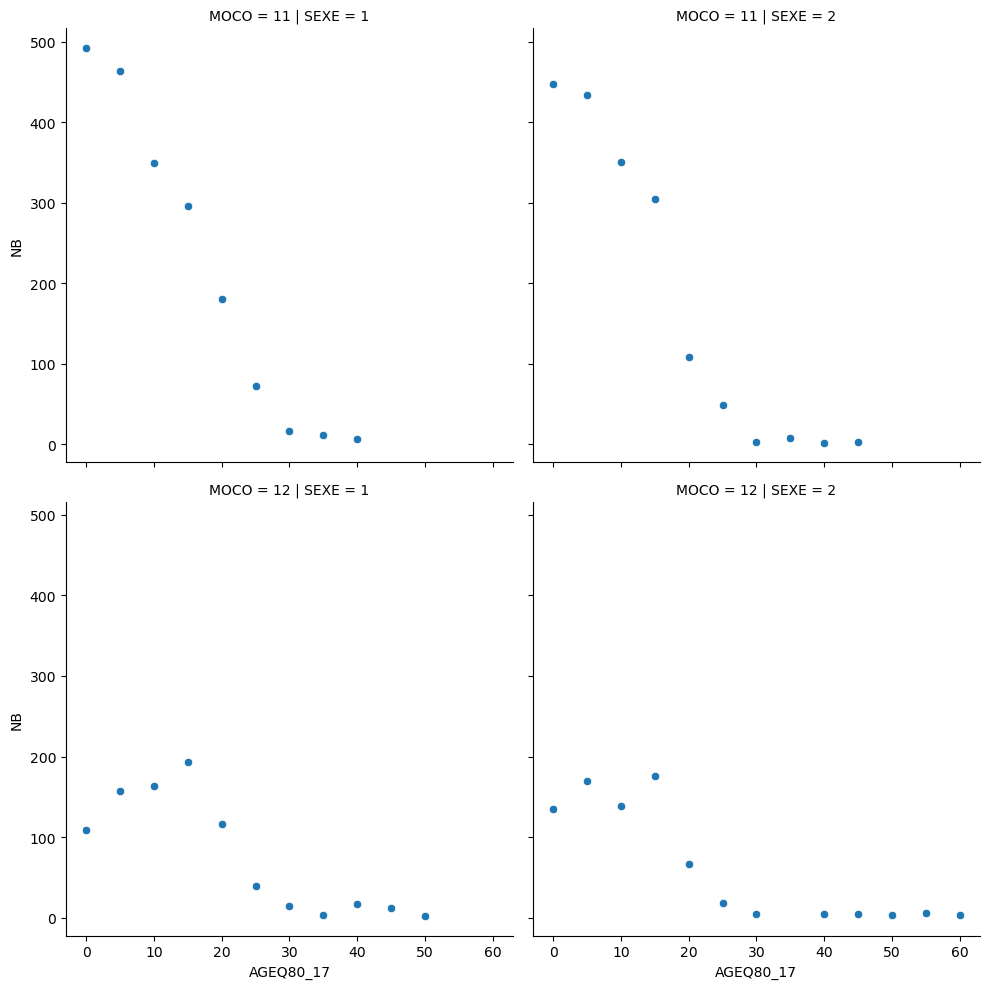

In [47]:
#affichage des relations entre les variables MOCO et SEXE
sns.relplot(x='AGEQ80_17', y='NB', col='SEXE', row='MOCO', data=df_population_vdr_enfant, kind= 'scatter')

In [48]:
#retrait des classes 11 et 12 de MOCO dans le dataframe df_population_vdr ainsi que 31 traitée séparemment
df_population_vdr_adult=df_population_vdr[(df_population_vdr['MOCO']==21) | (df_population_vdr['MOCO']==22) |(df_population_vdr['MOCO']==23) | (df_population_vdr['MOCO']==32)]

In [49]:
df_population_vdr_adult=df_population_vdr_adult[df_population_vdr_adult['NB']!=0]

In [50]:
df_population_vdr_adult

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB,DEP
4288835,COM,27701,Val-de-Reuil,21,15,2,6,27
4288836,COM,27701,Val-de-Reuil,21,20,1,18,27
4288837,COM,27701,Val-de-Reuil,21,20,2,52,27
4288838,COM,27701,Val-de-Reuil,21,25,1,85,27
4288839,COM,27701,Val-de-Reuil,21,25,2,76,27
...,...,...,...,...,...,...,...,...
4288993,COM,27701,Val-de-Reuil,32,70,2,26,27
4288994,COM,27701,Val-de-Reuil,32,75,1,2,27
4288995,COM,27701,Val-de-Reuil,32,75,2,12,27
4288996,COM,27701,Val-de-Reuil,32,80,1,8,27


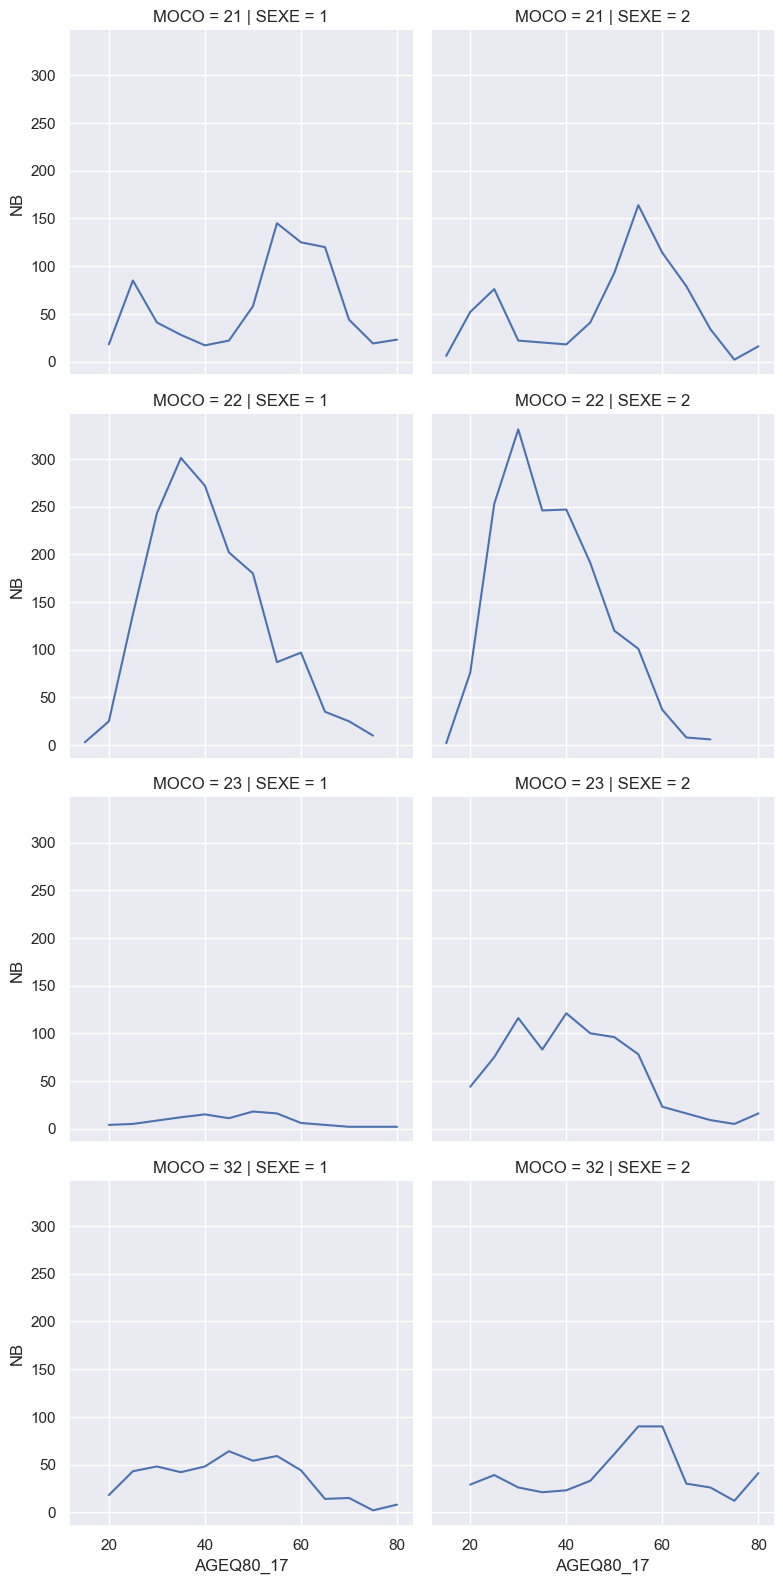

In [51]:
sns.set_theme()
sns.relplot(x='AGEQ80_17', y='NB', col='SEXE', row='MOCO', data=df_population_vdr_adult, kind= 'line', height=4, aspect=1);

In [52]:
df_entreprise_vdr.columns

Index(['CODGEO', 'LIBGEO', 'REG', 'DEP', 'E14TST', 'E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'],
      dtype='object')

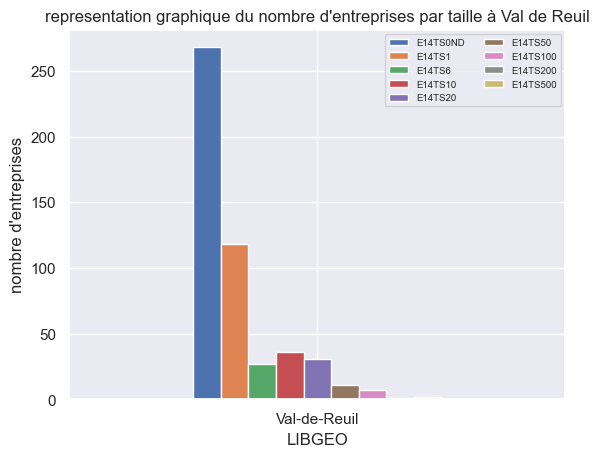

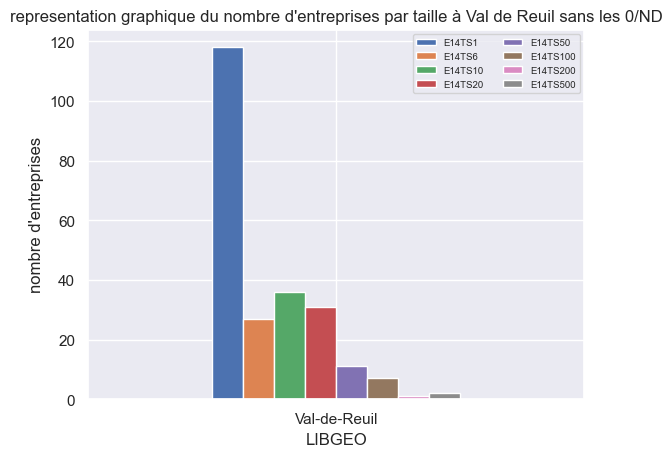

In [53]:
df_entreprise_vdr.plot.bar(x='LIBGEO', y=['E14TS0ND','E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'], stacked=False)
plt.title("representation graphique du nombre d'entreprises par taille à Val de Reuil")
plt.ylabel("nombre d'entreprises")
plt.xticks(rotation=0)
plt.legend(ncol=2, fontsize="xx-small");

df_entreprise_vdr.plot.bar(x='LIBGEO', y=['E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'], stacked=False)
plt.title("representation graphique du nombre d'entreprises par taille à Val de Reuil sans les 0/ND")
plt.ylabel("nombre d'entreprises")
plt.xticks(rotation=0)
plt.legend(ncol=2, fontsize="xx-small");


In [54]:
display(df_salaire_vdr.columns)

Index(['CODGEO', 'LIBGEO', 'SNHM14', 'SNHMC14', 'SNHMP14', 'SNHME14',
       'SNHMO14', 'SNHMF14', 'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
       'SNHMH14', 'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014', 'DEP'],
      dtype='object')

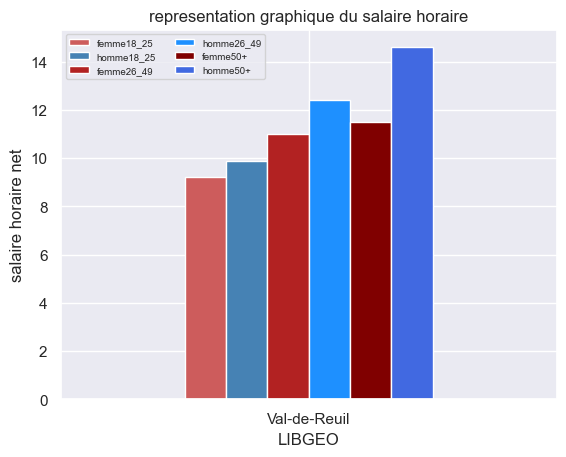

In [55]:
df_salaire_vdr.plot.bar(x='LIBGEO', y=['SNHMF1814','SNHMH1814', 'SNHMF2614','SNHMH2614', 'SNHMF5014', 'SNHMH5014'], color={'SNHMF1814':'indianred','SNHMH1814':'steelblue', 'SNHMF2614':'firebrick', 'SNHMH2614':'dodgerblue', 'SNHMF5014':'maroon', 'SNHMH5014':'royalblue'})
plt.title("representation graphique du salaire horaire")
plt.ylabel("salaire horaire net")
plt.xticks(rotation=0)
plt.legend(ncol=2, fontsize="xx-small", labels=['femme18_25','homme18_25','femme26_49','homme26_49','femme50+','homme50+']);

<Figure size 2000x2000 with 0 Axes>

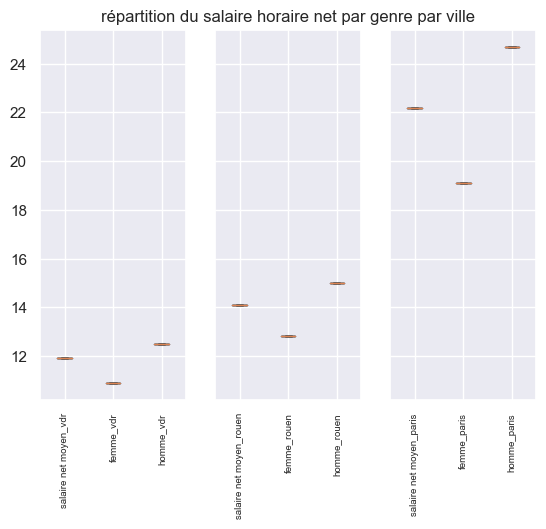

In [93]:
df_salaire_rouen= df_salaire[(df_salaire['LIBGEO']=='Rouen')]
df_salaire_paris= df_salaire[(df_salaire['LIBGEO']=='Paris')]
#affichage de la répartition statistique du salaire net moyen horaire par genre
fig=plt.figure(figsize=(20,20))

plt.subplots(1,3, sharey=True)
plt.subplot(131)
plt.boxplot(df_salaire_vdr[['SNHM14','SNHMF14', 'SNHMH14']], labels=['salaire net moyen_vdr', 'femme_vdr','homme_vdr'])
plt.xticks(rotation=90, fontsize="xx-small")
plt.subplot(132)
plt.title("répartition du salaire horaire net par genre par ville")
plt.xticks(rotation=90, fontsize="xx-small")
plt.boxplot(df_salaire_rouen[['SNHM14','SNHMF14', 'SNHMH14']], labels=['salaire net moyen_rouen', 'femme_rouen','homme_rouen'])
plt.subplot(133)
plt.boxplot(df_salaire_paris[['SNHM14','SNHMF14', 'SNHMH14']], labels=['salaire net moyen_paris', 'femme_paris','homme_paris'])
plt.xticks(rotation=90, fontsize="xx-small");